In [1]:
from numpy import linspace, cos, sqrt, pi, arange, newaxis, array
from numpy import zeros_like
from matplotlib.pyplot import gca, figure 

from scipy.fft import dct

In [2]:
def f(phi,a):
    n = arange(1,len(a)+1)
    return 1+(a*cos(n*phi[...,newaxis])).sum(axis=-1)

In [3]:
nphi = 60
phi  = linspace(0,2*pi,nphi)
a    = array([0.03,0.05,0.03, 0.02, 0.05])

In [4]:
y  = f(phi,a)
yn = [] 
for n,aa in enumerate(a):
    tmp    = zeros_like(a)
    tmp[n] = aa 
    ytmp   = f(phi,tmp)
    yn.append(ytmp)

In [5]:
def plot_y(phi,y,yn,ax=None,**kwargs):
    from matplotlib.pyplot import gca 
    
    ax = gca() if ax is None else ax 
    
    ax.plot(phi,y,label=r'$1+2\sum_n a_n\cos(n\varphi)$')
    for n,yy in enumerate(yn):
        ax.plot(phi,yy,label=fr'$1+a_{n+1}\cos({n+1}\varphi)$',**kwargs)
    ax.set_xlabel(r'$\varphi$')
    ax.set_ylabel(r'$f(\varphi)$')
    
    return ax

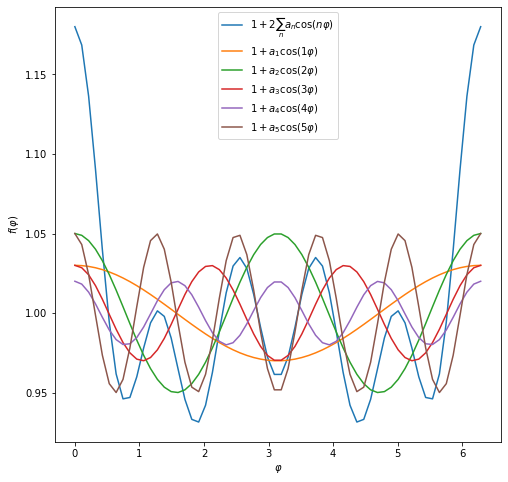

In [6]:
figure(figsize=(8,8))
ax = plot_y(phi,y,yn)
ax.legend();

In [7]:
b=dct(y,type=2,norm='ortho')

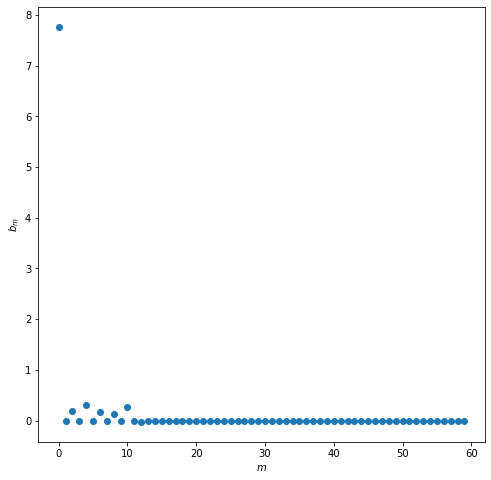

In [8]:
figure(figsize=(8,8))
ax = gca()
ax.plot(b,'o')
ax.set_xlabel('$m$')
ax.set_ylabel('$b_m$');

In [9]:
def g(b):
    m   = len(b) 
    n   = arange(1,m)
    k   = arange(0,m)
    phi = pi * (2*k+1) / (2*m)
    return 2*phi,(b[0]+2*(b[1:]*cos(n*phi[...,newaxis])).sum(axis=-1)) /sqrt(m)

In [10]:
zx,z  = g(b)
zn    = {} 
cc    = zeros_like(b)
o     = 2*(len(a)+1)
for n in range(2,o,2):
    tmp     = zeros_like(b)
    tmp[n]  = b[n]
    cc[n]   = b[n]
    _,ztmp  = g(tmp)
    zn[n] = ztmp
_, zn[8] = g(cc)

In [11]:
def plot_z(phi,z,zn,ax=None,**kwargs):
    from matplotlib.pyplot import gca 
    
    ax = gca() if ax is None else ax 
    
    ax.plot(phi,z,label=r'$\mathcal{F}^{-1}(\mathcal{F}(y))$')
    for n,zz in zn.items():
        ax.plot(phi,zz+1,label=fr'$\mathcal{{F}}^{{-1}}_{{{n+1}}}(\mathcal{{F}}(y))$',**kwargs)
    ax.set_xlabel(r'$\varphi$')
    ax.set_ylabel(r'$f(\varphi)$')
    
    return ax

In [12]:
figure(figsize=(8,8))
ax = plot_z(zx,z,zn,ls='--')
ax.set_prop_cycle(None)
ax = plot_y(phi,y,yn,ls=':')
ax.legend(ncol=2);

In [14]:
ax = gca()
m  = arange(2,o,2)
c  = b[2:o:2] * 2 / sqrt(2*len(b))
cc = c[0] / sqrt(2)
c[0] *=  sqrt(2*len(b)) /  sqrt(4*len(b))
ax.plot(m,c/a,'*-')
b[2:o:2],c,cc,a,c/a

(array([0.19716549, 0.29892656, 0.17849637, 0.12233994, 0.26072245]),
 array([0.02545396, 0.05457627, 0.03258883, 0.02233612, 0.04760119]),
 0.02545395504066002,
 array([0.03, 0.05, 0.03, 0.02, 0.05]),
 array([0.84846517, 1.09152548, 1.08629429, 1.11680578, 0.95202379]))